# Algorithme des $k$ plus proches voisins

### Exemples des iris.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
# neighbors traite de l'algorithme, datasets contient des données exemples
from sklearn import neighbors, datasets

# Les données sont déjà intégrées dans le module
iris = datasets.load_iris()     # un dictionnaire contenant les données
print(iris.keys())              # affiche les clés du  dictionnaire
print(iris['feature_names'])    # affiche les noms des données numériques
print(iris['target_names'])     # les noms des catégories d'iris
# Récupération des données : une ligne par fleur
petales = True                 # on s'intéresse aux pétales ou aux sépales
if petales:
    X = iris['data'][:, 2:]     # on ne garde que les dimensions des pétales
    donnee = 'petales'
else:
    X = iris['data'][:, :2]     # on ne garde que les dimensions des sépales
    donnee = 'sepales'

C = iris['target']              # les catégories

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


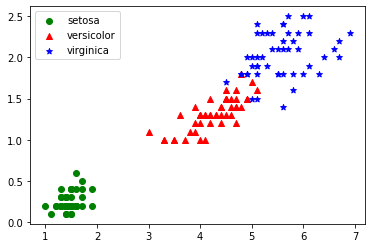

In [40]:
def graphique():
    # On trace les nuages de points représentant chaque fleur
    # La catégorie est représenté par la couleur
    couleurs = ['g', 'r', 'b']
    marqueurs = ['o', '^', '*']
    for i in range(len(iris['target_names'])):
        plt.scatter(X[C == i, 0], X[C == i, 1], color=couleurs[i],
                    label=iris['target_names'][i], marker=marqueurs[i])
    plt.legend()


plt.figure()
graphique()
plt.show()


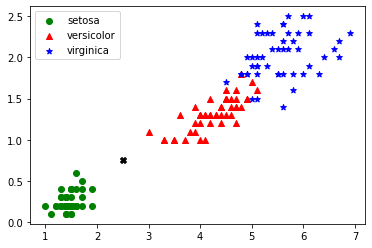

In [4]:
# Une nouvelle fleur
longueur=2.5 if petales else 5.7
largeur=0.75 if petales else 3.3
plt.figure()
graphique()
plt.scatter(longueur, largeur, color='k',marker='X')
plt.show()

In [5]:
def distance(a, b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)


def trace_voisins(k):
    plt.scatter(longueur, largeur, color='k', marker='X')
    d = [(i, distance(X[i], (longueur, largeur))) for i in range(len(X))]
    d.sort(key=lambda z: z[1])
    for i in range(k):
        plt.plot([longueur, X[d[i][0], 0]], [largeur, X[d[i][0], 1]], 'k')
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='datalim')
    ax.add_patch(plt.Circle((longueur, largeur),
                            d[k-1][1], color='k', fill=False))


In [7]:
def classifie(k):
    modele = neighbors.KNeighborsClassifier(n_neighbors=k)
    modele.fit(X, C)
    prediction = modele.predict([[longueur, largeur]])
    print(iris['target_names'][prediction[0]])
    plt.figure()
    plt.title(r'$k=$'+repr(k))
    graphique()
    trace_voisins(k)
    plt.show()

setosa


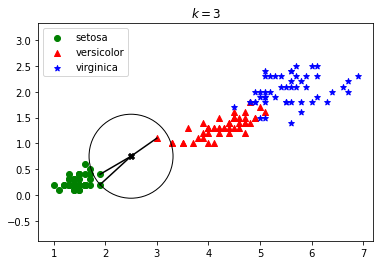

versicolor


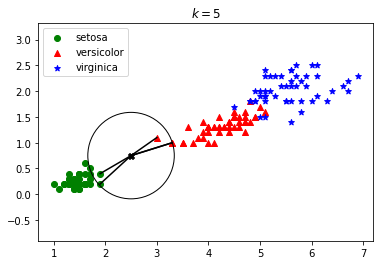

setosa


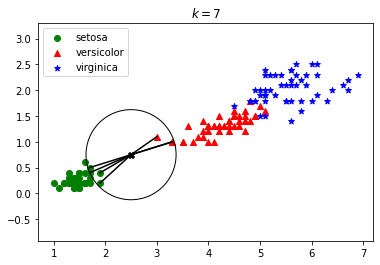

In [8]:
classifie(3)
classifie(5)
classifie(7)

### Reconnaissance de caractères (chiffres) manusrits.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
digits = datasets.load_digits()
X = digits['data']          # les données
C = digits['target']        # les catégories (chiffres)
images = digits['images']   # les images
# taille de l'échantillon d'apprentissage
taille_appr = 800
# taille de l'échantillon de test
taille_test = 36
Xappr = X[:taille_appr]
Cappr = C[:taille_appr]
Xtest = X[taille_appr:taille_appr+taille_test]
Ctest = C[taille_appr:taille_appr+taille_test]

k = 7
modele = neighbors.KNeighborsClassifier(n_neighbors=k)
modele.fit(Xappr, Cappr)
prediction = modele.predict(Xtest)

if taille_test < 40:
    print(prediction)   # les valeurs prédites
    print(Ctest)        # les vraies valeurs
    # on trace les images des chiffres testés
    _, axes = plt.subplots(nrows=1, ncols=len(
        Xtest), figsize=(0.272*taille_test, 0.3))
    for ax, image, label in zip(axes, images[taille_appr:taille_appr+taille_test], C[taille_appr:taille_appr+taille_test]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")


[4 5 6 7 8 9 0 9 5 5 6 5 0 3 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3]
[4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3]


Matrice de confusion :
[[5 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 1 0 0 0 0 0 3]]


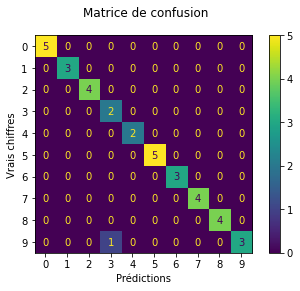

In [69]:
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(Ctest, prediction)
disp.figure_.suptitle("Matrice de confusion")
disp.ax_.set(
                # title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Prédictions', 
                ylabel='Vrais chiffres')
print(f"Matrice de confusion :\n{disp.confusion_matrix}")

plt.show()

# $k$-moyennes.

### Exemple des chiffres manuscrits.

Matrice de confusion :
[[  0 177   0   0   1   0   0   0   0   0]
 [ 24   0  99   0   0   1   2  55   0   1]
 [148   1   8   2   0   0   0   3   2  13]
 [  0   0   7  13   0   2   0   0   7 154]
 [  0   0   2   0 163   0   0   7   9   0]
 [  0   0   0  42   1 137   1   0   0   1]
 [  0   1   2   0   0   0 177   1   0   0]
 [  0   0   2   0   0   5   0   4 168   0]
 [  3   0  99  52   0   7   2   6   3   2]
 [  0   0   0 139   0   7   0  20   8   6]]


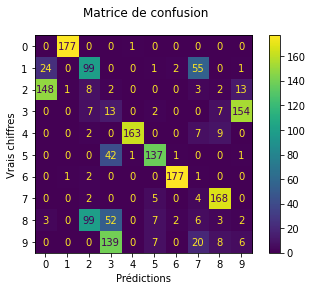

In [1]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
digits = datasets.load_digits()
X = digits['data']          # les données
C = digits['target']        # les catégories (chiffres)
images = digits['images']   # les images
modele = KMeans(n_clusters=10, random_state=0, n_init=1).fit(X)
prediction = modele.predict(X)

nb = 36

# affichage des nb premiers chiffres de chaque catégorie
for i in range(10):
    _, axes = plt.subplots(nrows=1, ncols=nb, figsize=(0.272*nb, 0.3))
    for ax, image, label in zip(axes, images[prediction == i][:nb], C[prediction == i][:nb]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.show()

# matrice de confusion
disp = metrics.ConfusionMatrixDisplay.from_predictions(C, prediction)
disp.figure_.suptitle("Matrice de confusion")
disp.ax_.set(
    # title='Sklearn Confusion Matrix with labels!!',
    xlabel='Prédictions',
    ylabel='Vrais chiffres')
print(f"Matrice de confusion :\n{disp.confusion_matrix}")

plt.show()


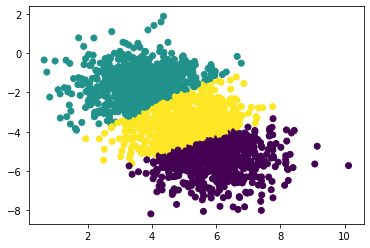

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
n = 2000
random_state = 10
X, y = make_blobs(n_samples=n)
modele = KMeans(n_clusters=3, n_init=1).fit(X)
prediction = modele.predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=prediction)
plt.show()
